# Analyse Std Dev Markit

In [533]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [534]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 05.csv")

data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]


C:\Users\rmolli\AppData\Local\Temp\ipykernel_164544\1716815421.py:2: DtypeWarning: Columns (40,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"Data Mark-It Raw 05.csv")


## Germany Base Load Analysis

In [535]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

### Calcul Divers

In [536]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate'] == '2023-01-31 00:00:00' ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

4.93602486
1.68245435
3.82


In [537]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate'].isin(short_term) ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

8.87670753
0.18491021
1.96


### Analyse Quarters

In [538]:
quarters = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_quarters.shape[1]):
        recap_Ger_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_quarters.shape[1]):
      recap_Ger_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Ger_quarters.dropna(inplace = True, axis='columns' )
recap_Ger_quarters

,2022-09-30 00:00:00,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,...,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00,2027-09-30 00:00:00,2027-12-31 00:00:00,2028-03-31 00:00:00,2028-06-30 00:00:00,2028-09-30 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,0.18,0.25,0.36,0.23,0.44,0.21,1.14,0.61,1.8,0.2,...,0.59,0.08,0.87,0.36,0.19,0.3,2.64,1.74,1.76,0.17
Average,1.65,2.08,3.26,1.37,1.67,1.5,3.15,1.96,3.16,2.67,...,2.48,1.38,4.73,2.48,2.54,1.32,4.54,3.13,2.63,1.3
Max,5.21,7.72,7.86,2.87,3.98,3.75,7.13,4.41,4.66,5.29,...,3.76,2.96,6.9,4.32,4.96,3.78,6.12,4.45,3.18,2.79
Nb of Prices,15.48,15.81,14.36,13.67,13.31,14.11,12.12,12.12,12.12,13.3,...,7.55,8.46,7.07,6.6,6.57,6.7,4.66,4.66,4.66,4.92


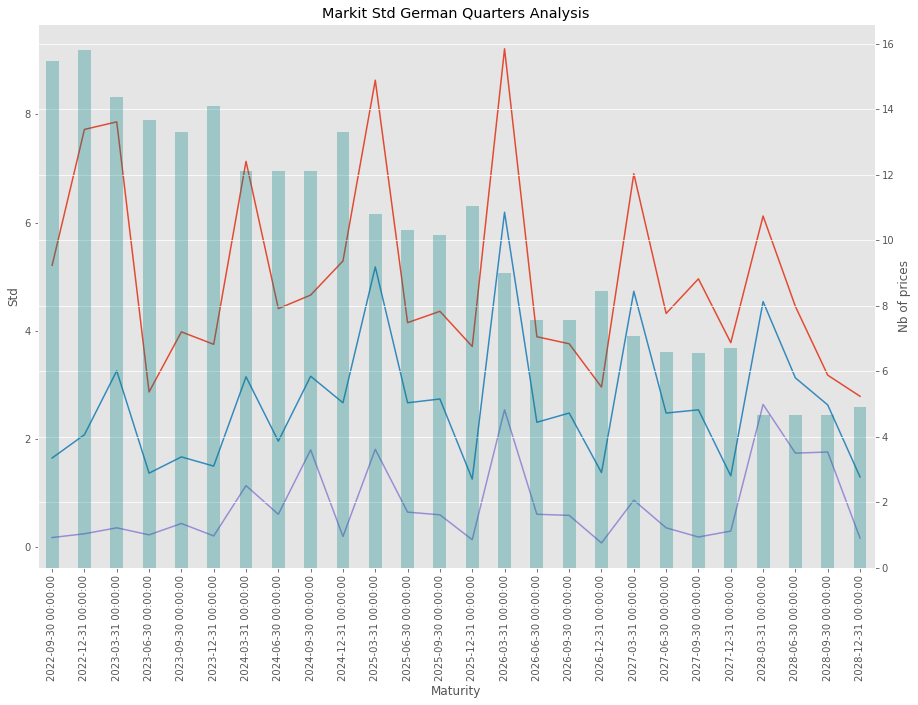

In [539]:
plt.figure(figsize=(15, 10))
plt.title("Markit Std German Quarters Analysis")

recap_Ger_quarters.loc['Max'].plot()
recap_Ger_quarters.loc['Average'].plot()
ax1= recap_Ger_quarters.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Ger_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [540]:
print(round(recap_Ger_quarters.loc["Min", :].mean(),2))
print(round(recap_Ger_quarters.loc["Max", :].mean(),2))
print(round(recap_Ger_quarters.loc["Average", :].mean(),2))

0.79
5.0
2.67


### Analyse Months

In [541]:
months = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Ger_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_months.shape[1]):
        recap_Ger_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Ger_months.dropna(inplace = True, axis='columns' )
recap_Ger_months

,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,...,2028-03-31 00:00:00,2028-04-30 00:00:00,2028-05-31 00:00:00,2028-06-30 00:00:00,2028-07-31 00:00:00,2028-08-31 00:00:00,2028-09-30 00:00:00,2028-10-31 00:00:00,2028-11-30 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,0.19,0.41,0.42,0.18,1.65,1.37,0.25,1.68,1.03,0.36,...,2.64,3.28,5.29,1.74,2.83,3.69,1.76,1.68,0.76,0.17
Average,1.04,1.31,1.59,1.65,4.63,2.42,2.08,3.82,2.51,3.26,...,4.54,3.28,5.29,3.13,2.83,3.69,2.63,1.68,0.76,1.3
Max,4.5,4.94,4.3,5.21,8.88,3.61,7.72,4.94,4.5,7.86,...,6.12,3.28,5.29,4.45,2.83,3.69,3.18,1.68,0.76,2.79
Nb of Prices,15.6,15.38,15.19,15.48,14.86,14.71,15.81,14.05,13.76,14.36,...,4.66,4.25,4.25,4.66,4.25,4.25,4.66,4.25,4.2,4.92


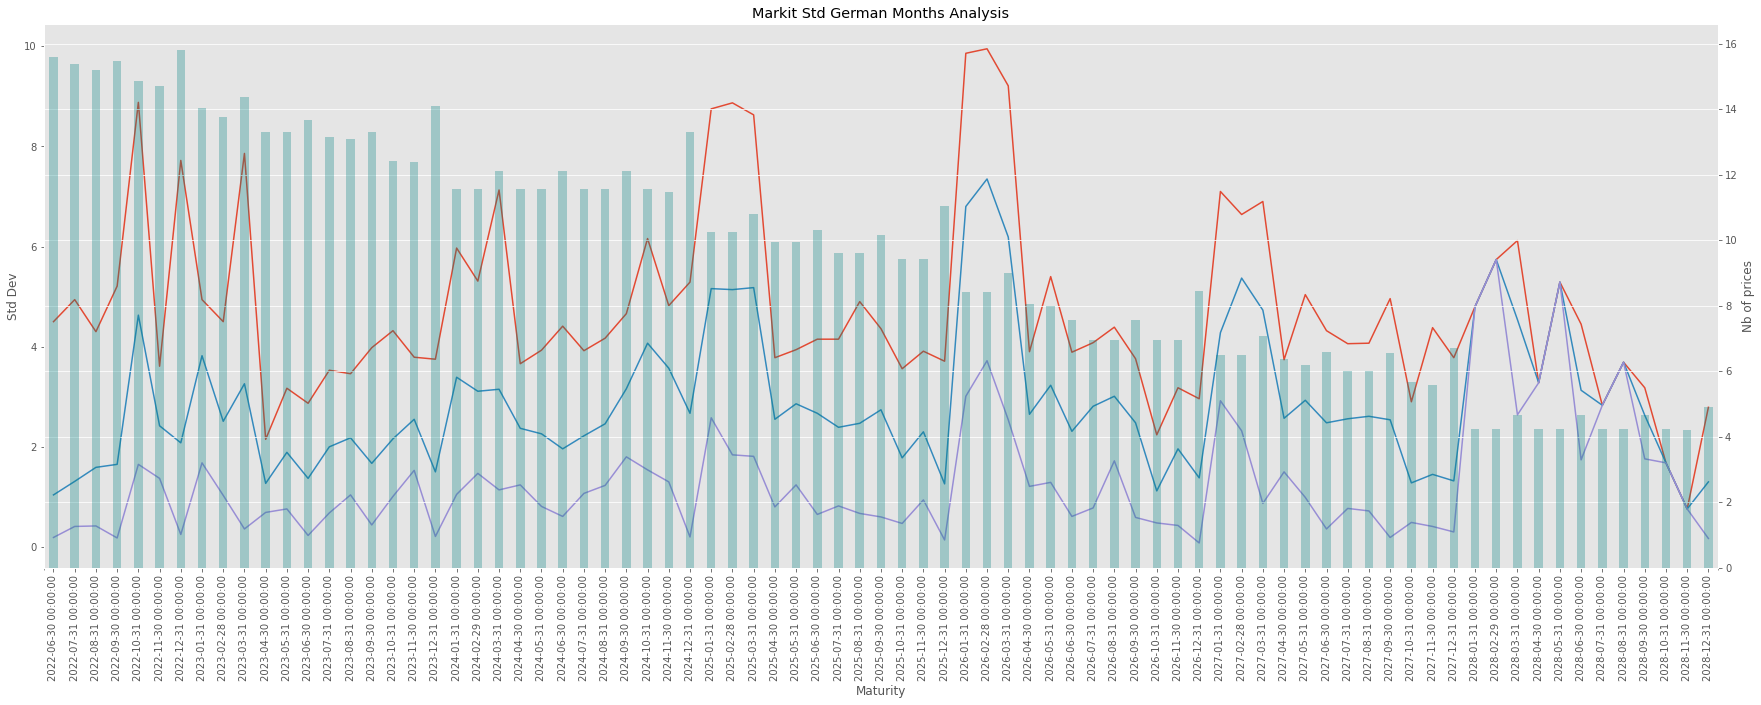

In [542]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std German Months Analysis")

recap_Ger_months.loc['Max'].plot()
recap_Ger_months.loc['Average'].plot()
ax1= recap_Ger_months.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4,7,10]))

In [543]:
print(round(recap_Ger_months.loc["Min", :].mean(),2))
print(round(recap_Ger_months.loc["Max", :].mean(),2))
print(round(recap_Ger_months.loc["Average", :].mean(),2))

1.3
4.75
2.87


### Analyse Years

In [544]:
years = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_years.index.name = 'Statistics | Maturity'
recap_Ger_years

,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00,2027-12-31 00:00:00,2028-12-31 00:00:00,2029-12-31 00:00:00,2030-12-31 00:00:00,2031-12-31 00:00:00
Statistics | Maturity,,,,,,,,,
Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nb of Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
years = data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Ger_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Ger_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Ger_years.shape[1]):
        recap_Ger_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'GERMAN POWER - BASELOAD') & (data['ns1:EndDate']== recap_Ger_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Ger_years.dropna(inplace = True, axis='columns' )
recap_Ger_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00,2027-12-31 00:00:00,2028-12-31 00:00:00
Statistics | Maturity,,,,,,
Min,0.21,0.2,0.14,0.08,0.3,0.17
Average,1.5,2.67,1.26,1.38,1.32,1.3
Max,3.75,5.29,3.71,2.96,3.78,2.79
Nb of Prices,14.11,13.3,11.03,8.46,6.7,4.92


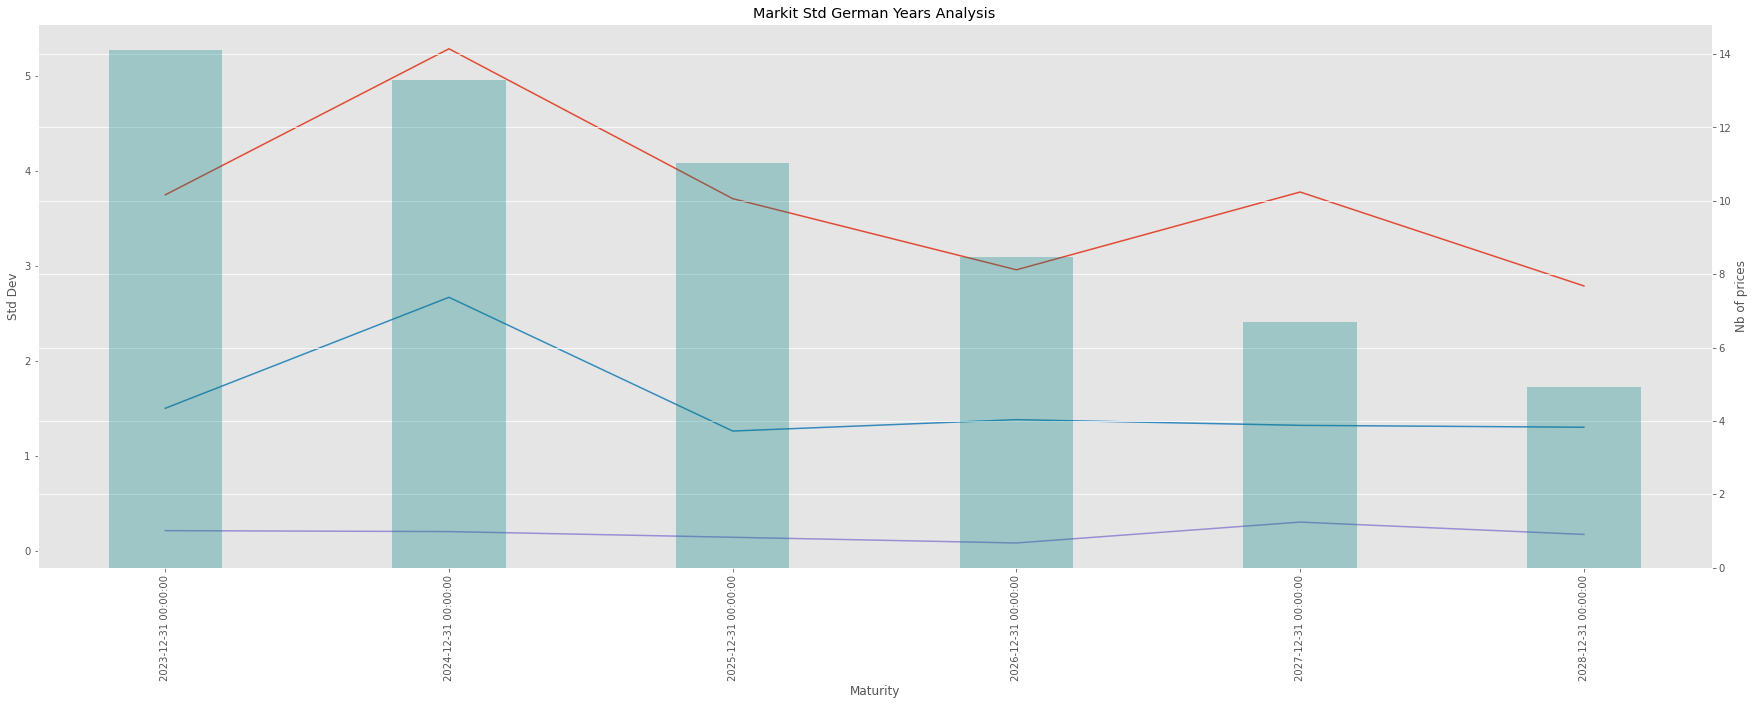

In [546]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std German Years Analysis")

recap_Ger_years.loc['Max'].plot()
recap_Ger_years.loc['Average'].plot()
ax1= recap_Ger_years.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [547]:
print(round(recap_Ger_years.loc["Min", :].mean(),2))
print(round(recap_Ger_years.loc["Max", :].mean(),2))
print(round(recap_Ger_years.loc["Average", :].mean(),2))

0.18
3.71
1.57
